In [ ]:
#Set up and Read the data
import pandas as pd
import sqlite3
# connect to database
conn = sqlite3.connect("GroceriesMarketAnalysis")
cur = conn.cursor()

In [ ]:
# read excel file to insert data into ABCSupermarketData Table
dfABCSupermarketData= pd.read_csv('/content/Groceries_dataset1.csv')
dfABCSupermarketData.to_sql('ABCSupermarketData',conn,if_exists='replace',index=False)
conn.commit()

In [ ]:
#CHECK IF DATA INSERTED INTO TABLE TIME_TABLE
ABCSupermarketData = pd.read_sql('SELECT * FROM ABCSupermarketData', conn)
ABCSupermarketData

,Member_number,Date,itemDescription,Cost,Date_Numeric_value
0,1808,21-Jul-15,tropical fruit,4.0,42206
1,2552,05-Jan-15,whole milk,2.0,42009
2,2300,19-Sep-15,pip fruit,3.0,42266
3,1187,12-Dec-15,other vegetables,5.0,42350
4,3037,01-Feb-15,whole milk,2.0,42036
...,...,...,...,...,...
38760,4471,08-Oct-14,sliced cheese,4.0,41920
38761,2022,23-Feb-14,candy,10.0,41693
38762,1097,16-Apr-14,cake bar,10.0,41745
38763,1510,03-Dec-14,fruit/vegetable juice,10.0,41976


In [ ]:
ABCSupermarketData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Member_number       38765 non-null  int64  
 1   Date                38765 non-null  object 
 2   itemDescription     38765 non-null  object 
 3   Cost                38765 non-null  float64
 4   Date_Numeric_value  38765 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
ABCSupermarketData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Member_number,38765.0,3003.641868,1153.611031,1000.0,2002.0,3005.0,4007.0,5000.0
Cost,38765.0,6.552447,6.673476,0.4,2.0,5.0,7.0,38.0
Date_Numeric_value,38765.0,42013.761950,209.474506,41640.0,41832.0,42025.0,42195.0,42368.0


In [ ]:
#Get count of values in a categorical variable
print(ABCSupermarketData.Member_number.value_counts())
print(ABCSupermarketData.itemDescription.value_counts())
#df_Fact.itemDescription.hist(figsize=(10,5))

3180    36
3737    33
3050    33
2051    33
2625    31
        ..
2503     2
3301     2
1775     2
3723     2
2417     2
Name: Member_number, Length: 3898, dtype: int64
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64


In [ ]:
ABCSupermarketData.isna().sum()

Member_number         0
Date                  0
itemDescription       0
Cost                  0
Date_Numeric_value    0
dtype: int64

In [ ]:
# find total duplicate entries and drop them if any

print(f'total duplicate rows: {ABCSupermarketData.duplicated().sum()}')


total duplicate rows: 759


In [ ]:
# Display duplucate records of a member with number of duplicacies
duplicate_records=pd.read_sql_query('''select
                Member_number,	Date, 	itemDescription ,
       count(*)
from ABCSupermarketData
group by Member_number,Date,itemDescription
having count(*) > 1''',conn)
duplicate_records

,Member_number,Date,itemDescription,count(*)
0,1003,27-Feb-14,rolls/buns,2
1,1005,09-Jan-14,rolls/buns,2
2,1006,14-Jun-15,frankfurter,2
3,1008,21-Jul-15,yogurt,2
4,1026,28-May-15,root vegetables,2
...,...,...,...,...
727,4960,19-Aug-15,bottled water,2
728,4968,04-Mar-14,beef,2
729,4981,10-Jan-15,margarine,3
730,4988,29-Oct-15,rolls/buns,2


In [ ]:
# drop duplicate rows if any
ABCSupermarketData = ABCSupermarketData[~ABCSupermarketData.duplicated()]
ABCSupermarketData.shape

(38006, 5)

In [ ]:
# recheck for total duplicate entries after droping

print(f'total duplicate rows: {ABCSupermarketData.duplicated().sum()}')


total duplicate rows: 0


In [ ]:
ABCSupermarketData.corr()

<ipython-input-12-f9bfbe102963>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ABCSupermarketData.corr()


,Member_number,Cost,Date_Numeric_value
Member_number,1.000000,0.007485,0.001035
Cost,0.007485,1.000000,-0.017073
Date_Numeric_value,0.001035,-0.017073,1.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


<ipython-input-14-6706d024e1d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= ABCSupermarketData.corr()


<Axes: >

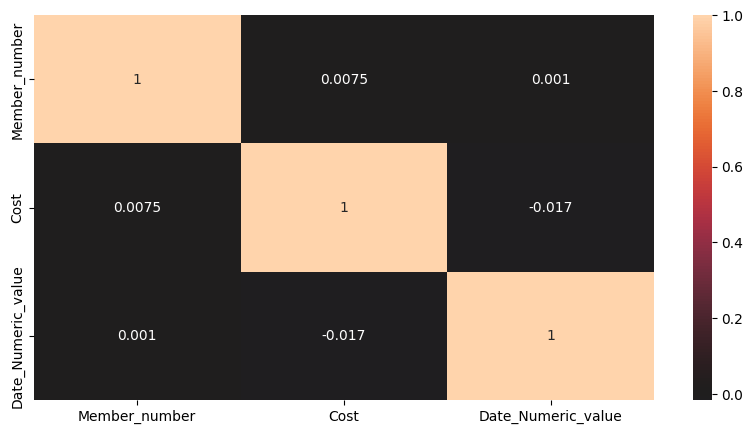

In [ ]:
#correlation matrix
corrmat= ABCSupermarketData.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corrmat,annot=True, center=0)

In [ ]:
# Detect Column names with whitespaces(Leading and trailing)
[x for x in ABCSupermarketData.columns if x.endswith(' ') or x.startswith(' ')]

[]

<ipython-input-16-2bcb8d091d80>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ABCSupermarketData['Member_number'])


Text(0, 0.5, 'Count')

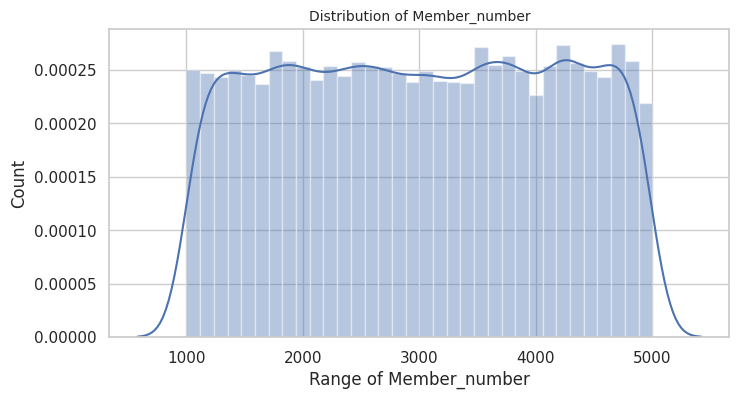

In [ ]:
#Distribution of Member number
plt.figure(figsize=(8, 4))
sns.set(style = 'whitegrid')
sns.distplot(ABCSupermarketData['Member_number'])
plt.title('Distribution of Member_number', fontsize = 10)
plt.xlabel('Range of Member_number')
plt.ylabel('Count')


<ipython-input-17-87e27d967434>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ABCSupermarketData['Cost'])


Text(0, 0.5, 'Count')

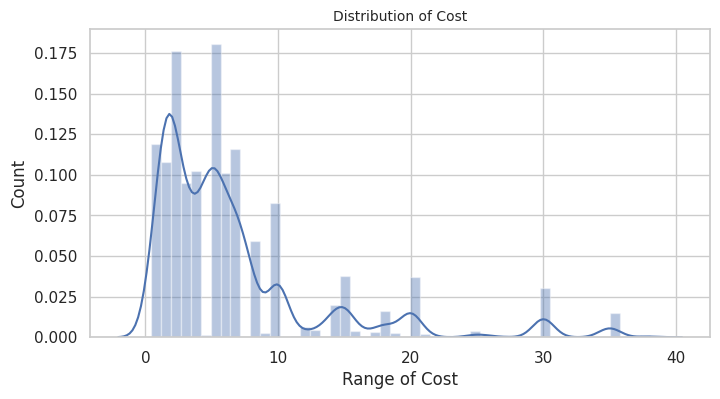

In [ ]:
#Distribution of Cost
plt.figure(figsize=(8, 4))
sns.set(style = 'whitegrid')
sns.distplot(ABCSupermarketData['Cost'])
plt.title('Distribution of Cost', fontsize = 10)
plt.xlabel('Range of Cost')
plt.ylabel('Count')


In [ ]:
Cleaned_data=pd.read_sql_query('''SELECT Member_number,
                       Date,
                       COUNT(DISTINCT Date) AS Total_purchases,
                       SUM(Cost) AS Total_monetary_value,
                       MAX(Date_Numeric_value) AS Last_date
                       FROM ABCSupermarketData
                        GROUP BY Member_Number
                        ORDER BY Member_number''',conn)
# Write clean CRM data into the database
Cleaned_data.to_sql("Cleaned_data", conn)

3898

<ipython-input-19-8b146b7c43ea>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Cleaned_data['Total_monetary_value'])


Text(0, 0.5, 'Count')

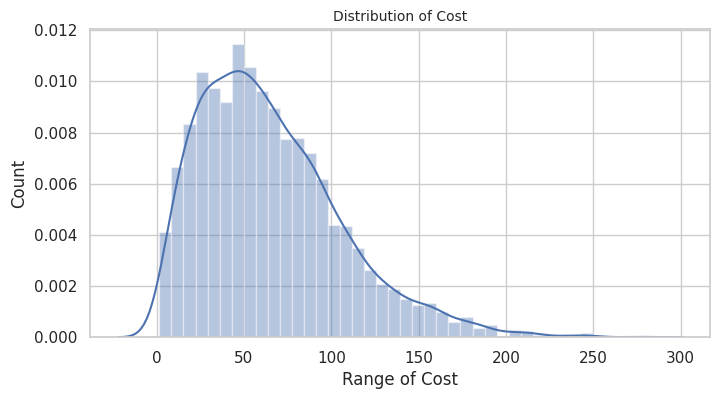

In [ ]:
#Distribution of Total_monetary_value
plt.figure(figsize=(8, 4))
sns.set(style = 'whitegrid')
sns.distplot(Cleaned_data['Total_monetary_value'])
plt.title('Distribution of Cost', fontsize = 10)
plt.xlabel('Range of Cost')
plt.ylabel('Count')


In [ ]:
Cleaned_data

,Member_number,Date,Total_purchases,Total_monetary_value,Last_date
0,1000,25-Nov-15,5,68.13,42333
1,1001,02-May-15,5,39.89,42126
2,1002,30-Aug-15,4,59.15,42246
3,1003,10-Feb-15,4,30.49,42045
4,1004,02-Dec-15,8,94.30,42340
...,...,...,...,...,...
3893,4996,24-Nov-15,3,87.00,42332
3894,4997,27-Dec-15,2,54.50,42365
3895,4998,14-Oct-15,1,4.00,42291
3896,4999,26-Dec-15,6,72.30,42364


In [ ]:
Cleaned_data.corr()

<ipython-input-21-1a08a133aec0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Cleaned_data.corr()


,Member_number,Total_purchases,Total_monetary_value,Last_date
Member_number,1.000000,0.006844,0.011975,0.007865
Total_purchases,0.006844,1.000000,0.779612,0.431581
Total_monetary_value,0.011975,0.779612,1.000000,0.378443
Last_date,0.007865,0.431581,0.378443,1.000000


<ipython-input-22-4ce4fb1280e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= Cleaned_data.corr()


<Axes: >

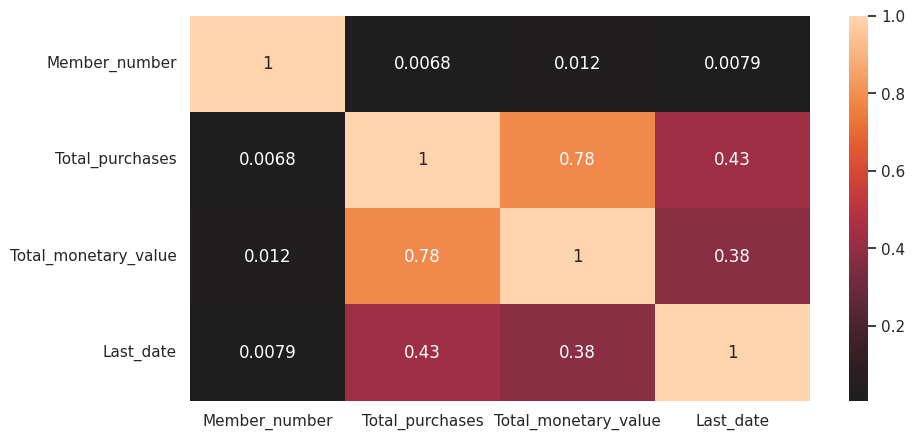

In [ ]:
#correlation matrix
corrmat= Cleaned_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corrmat,annot=True, center=0)

In [ ]:
Cleaned_data.dtypes
Cleaned_data['Date'] = pd.to_datetime(Cleaned_data['Date'], errors='coerce')
Cleaned_data.dtypes

Member_number                    int64
Date                    datetime64[ns]
Total_purchases                  int64
Total_monetary_value           float64
Last_date                        int64
dtype: object

In [ ]:
Cleaned_data

,Member_number,Date,Total_purchases,Total_monetary_value,Last_date
0,1000,2015-11-25,5,68.13,42333
1,1001,2015-05-02,5,39.89,42126
2,1002,2015-08-30,4,59.15,42246
3,1003,2015-02-10,4,30.49,42045
4,1004,2015-12-02,8,94.30,42340
...,...,...,...,...,...
3893,4996,2015-11-24,3,87.00,42332
3894,4997,2015-12-27,2,54.50,42365
3895,4998,2015-10-14,1,4.00,42291
3896,4999,2015-12-26,6,72.30,42364


In [ ]:
# Create date variable that records recency
import numpy as np
import datetime
Cleaned_data["Date"] = Cleaned_data["Date"].dt.date
# Create snapshot date
snapshot_date = Cleaned_data['Date'].max() + datetime.timedelta(days=1)
print(snapshot_date)
# Aggregate data by each customer
customers = Cleaned_data.groupby(['Member_number']).agg({

   'Date': lambda x: (snapshot_date - x.max()).days,
   'Total_purchases':'sum' ,
   'Total_monetary_value': 'sum'})

2015-12-31


In [ ]:

Cleaned_data.drop(['Last_date'], axis=1, inplace=True)

In [ ]:
# Rename columns
customers.rename(columns = {
                              'Date': 'Recency',
                            'Total_purchases': 'Frequency',
                            'Total_monetary_value': 'MonetaryValue'}, inplace=True)

In [ ]:
customers

,Recency,Frequency,MonetaryValue
Member_number,,,
1000,36,5,68.13
1001,243,5,39.89
1002,123,4,59.15
1003,324,4,30.49
1004,29,8,94.30
...,...,...,...
4996,37,3,87.00
4997,4,2,54.50
4998,78,1,4.00


In [ ]:
customers.to_sql('customers',conn,if_exists='replace',index=False)
conn.commit()

In [ ]:
customers = pd.read_sql('SELECT * FROM customers', conn)
customers

,Recency,Frequency,MonetaryValue
0,36,5,68.13
1,243,5,39.89
2,123,4,59.15
3,324,4,30.49
4,29,8,94.30
...,...,...,...
3893,37,3,87.00
3894,4,2,54.50
3895,78,1,4.00
3896,5,6,72.30


Text(0.5, 1.0, 'Histogram and Recency')

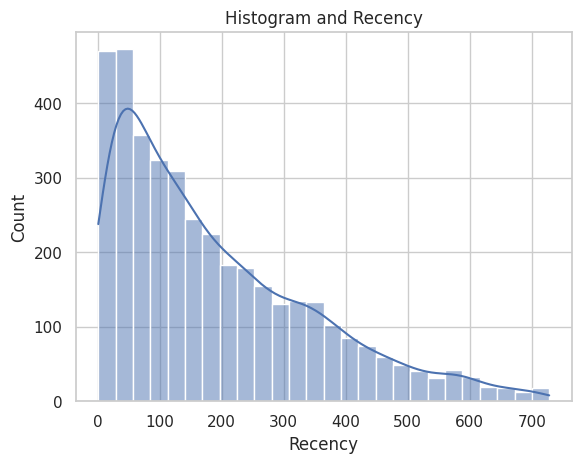

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.histplot(data=customers, x='Recency', kde=True)
ax.set_title('Histogram and Recency')

Text(0.5, 1.0, 'Histogram and Frequency')

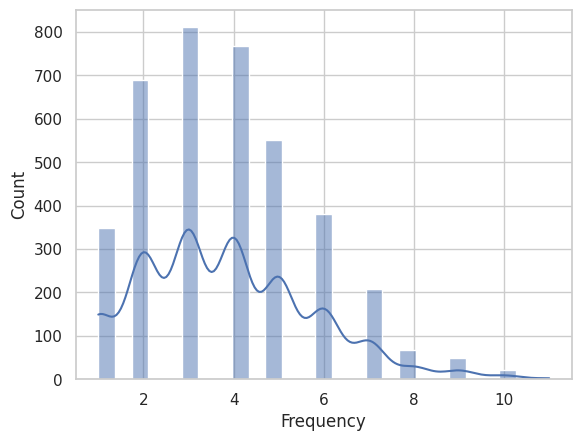

In [ ]:

sns.histplot(data=customers, x='Frequency', kde=True)
ax.set_title('Histogram and Frequency')

Text(0.5, 1.0, 'Histogram and MonetaryValue')

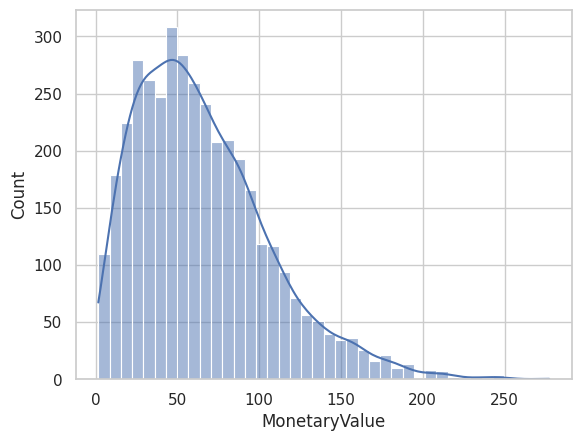

In [ ]:

sns.histplot(data=customers, x='MonetaryValue', kde=True)
ax.set_title('Histogram and MonetaryValue')

<ipython-input-34-c0b1d703298e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(customers['Recency'])
<ipython-input-34-c0b1d703298e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(customers['Frequency'])
<ipython-input-34-c0b1d703298e>:12: UserWarn

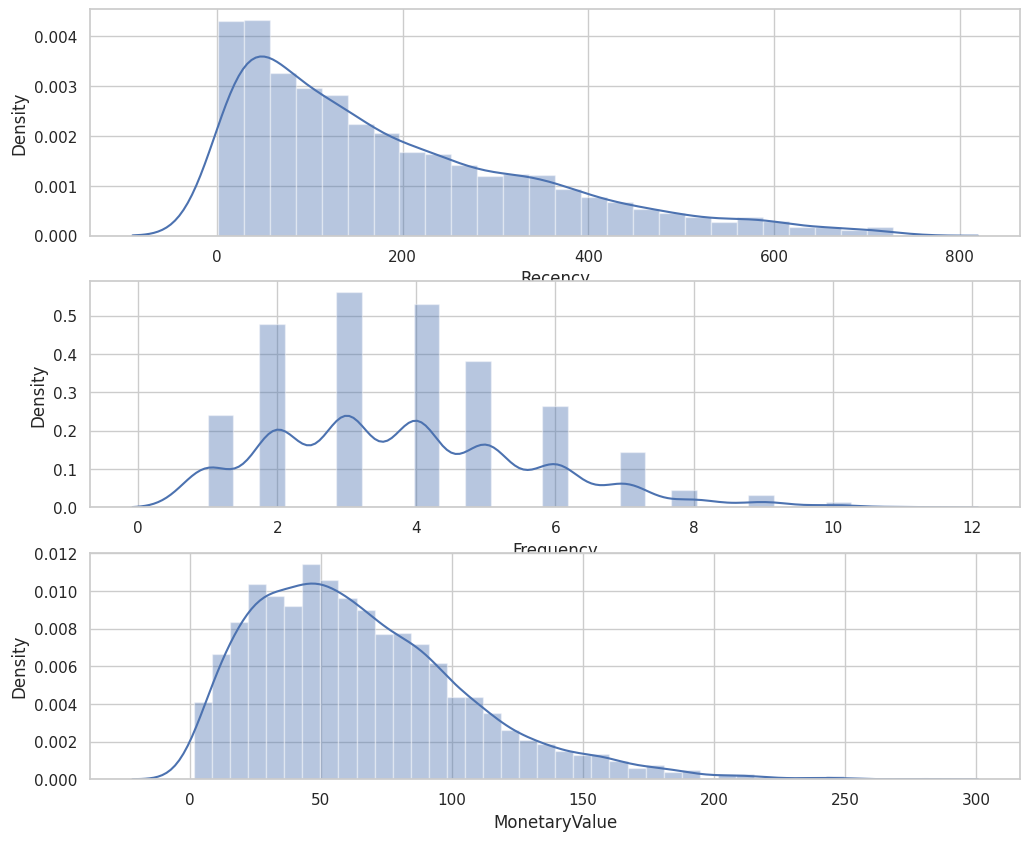

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(customers['Recency'])


# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(customers['Frequency'])


# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(customers['MonetaryValue'])
# Show the plot
plt.show()

In [ ]:
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = stats.boxcox(customers['MonetaryValue'])[0]
customers_fix.tail()

,Recency,Frequency,MonetaryValue
3893,7.016236,1.412097,12.656911
3894,1.763905,0.810273,10.039021
3895,9.852175,0.000000,1.862045
3896,2.132343,2.725071,11.561069
3897,17.690836,1.412097,10.797699


<ipython-input-36-d84e716d4787>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])
<ipython-input-36-d84e716d4787>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])
<ipython-input-36-d84e716d4787>:9: U

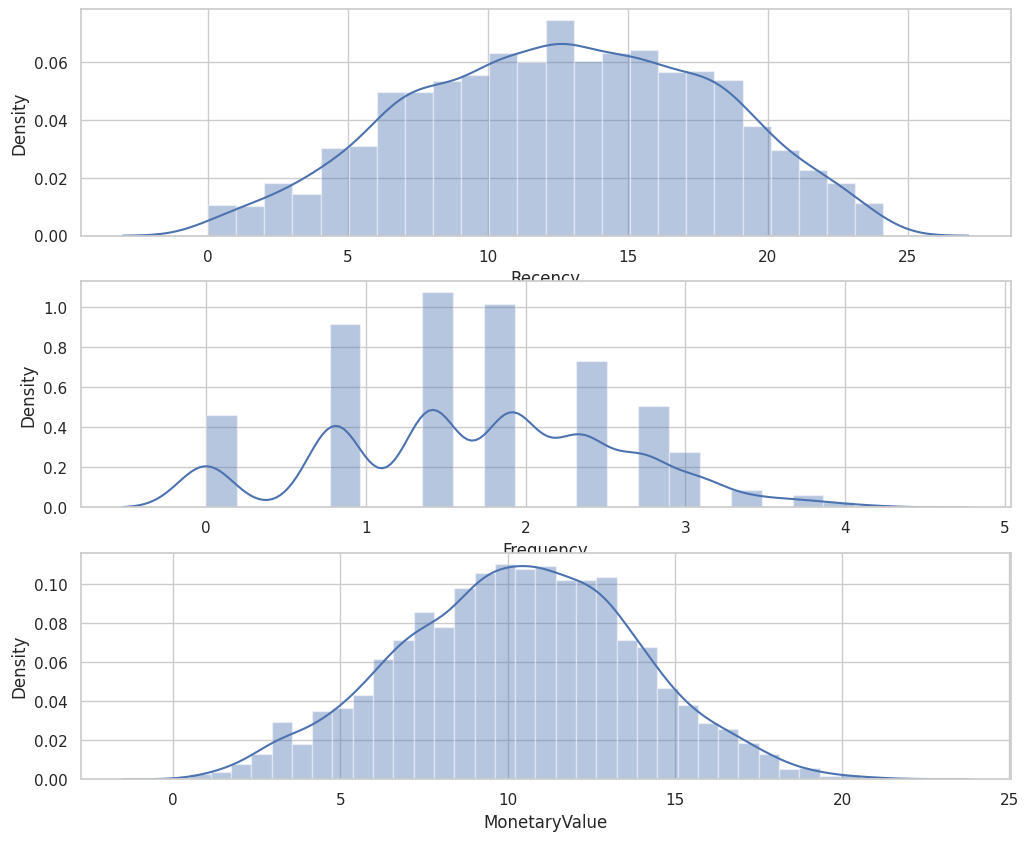

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(customers_fix['MonetaryValue'])
# Show the plot
plt.show()

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[ 0. -0.  0.]
[1. 1. 1.]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

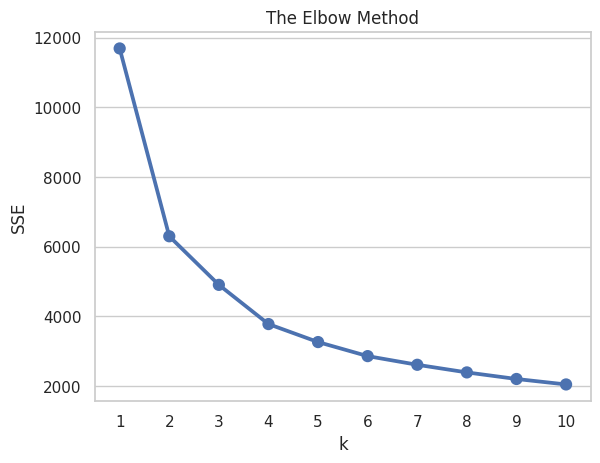

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

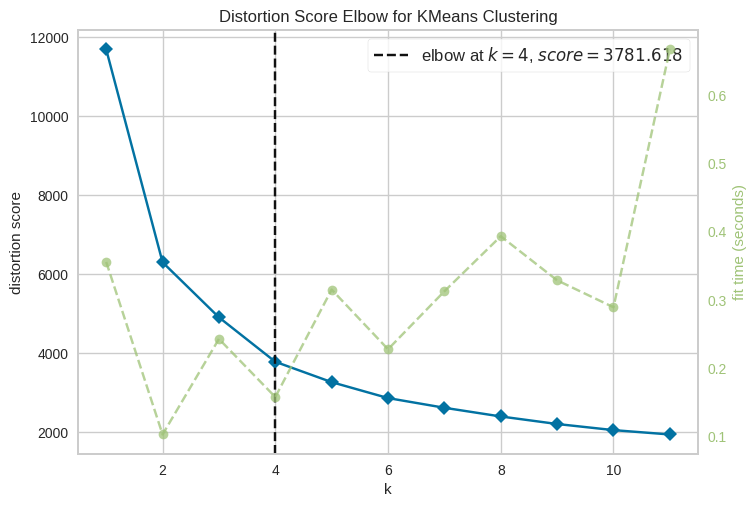

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(customers_normalized)
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Recency,Frequency,MonetaryValue
Cluster,,,
0,885,885,885
1,890,890,890
2,1134,1134,1134
3,989,989,989


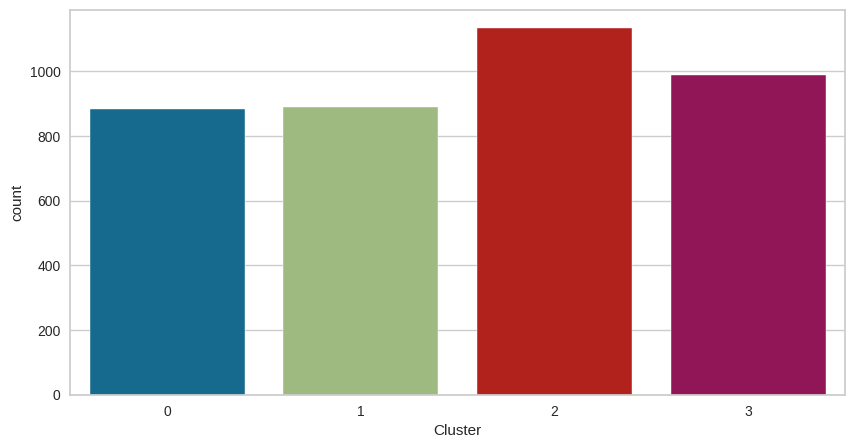

In [ ]:

model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x="Cluster", data=customers)
customers.groupby(['Cluster']).count()

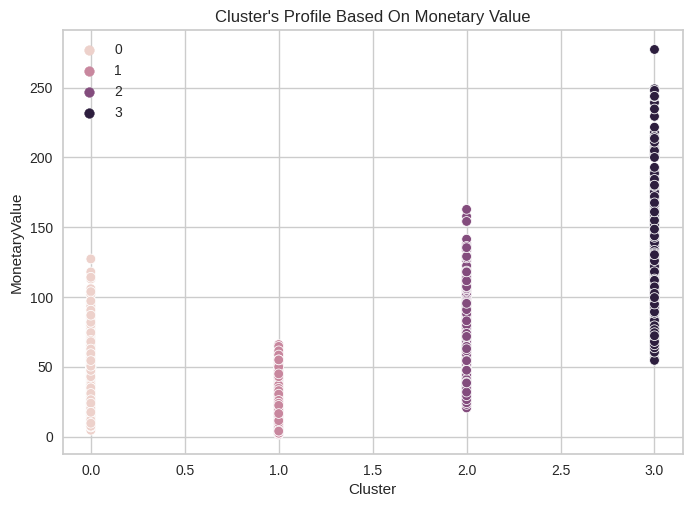

In [ ]:
pl = sns.scatterplot(data = customers,x=customers["Cluster"], y=customers["MonetaryValue"],hue=customers["Cluster"])
pl.set_title("Cluster's Profile Based On Monetary Value")
plt.legend()
plt.show()

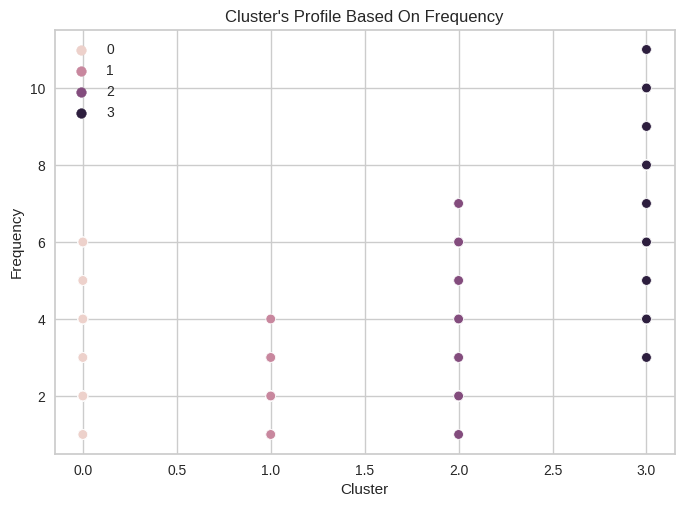

In [ ]:
pl = sns.scatterplot(data = customers,x=customers["Cluster"], y=customers["Frequency"],hue=customers["Cluster"])
pl.set_title("Cluster's Profile Based On Frequency")
plt.legend()
plt.show()

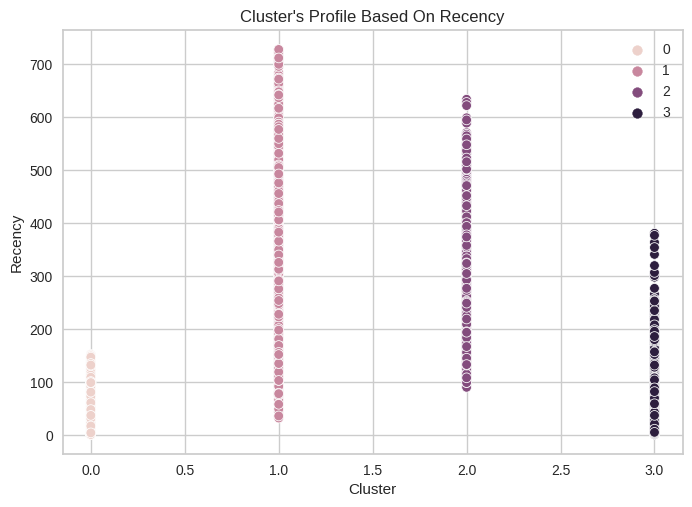

In [ ]:
pl = sns.scatterplot(data = customers,x=customers["Cluster"], y=customers["Recency"],hue=customers["Cluster"])
pl.set_title("Cluster's Profile Based On Recency")
plt.legend()
plt.show()

In [ ]:
customers["Cluster"] = model.labels_
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         55.44      3.29         49.48   885
1        355.02      1.75         23.39   890
2        256.99      3.87         66.36  1134
3         79.98      6.17        115.42   989

In [ ]:
customers

,Recency,Frequency,MonetaryValue,Cluster
0,36,5,68.13,0
1,243,5,39.89,2
2,123,4,59.15,2
3,324,4,30.49,2
4,29,8,94.30,3
...,...,...,...,...
3893,37,3,87.00,0
3894,4,2,54.50,0
3895,78,1,4.00,1
3896,5,6,72.30,3


<Axes: xlabel='Attribute', ylabel='Value'>

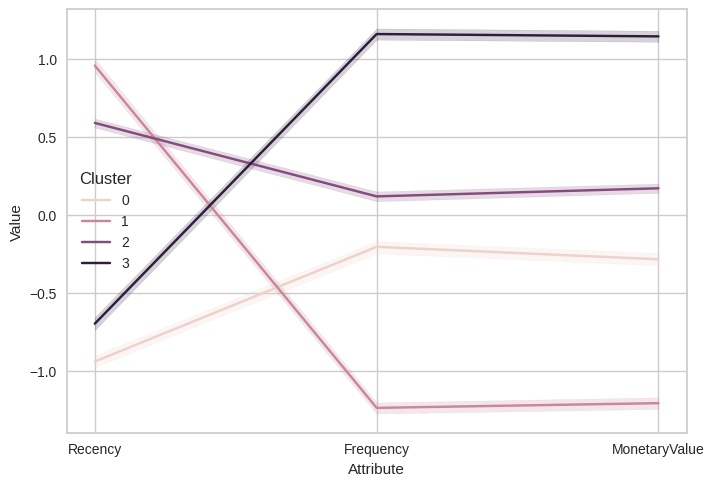

In [ ]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()
# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)

In [ ]:
df_nor_melt

,ID,Cluster,Attribute,Value
0,0,0,Recency,-1.083711
1,1,2,Recency,0.588682
2,2,2,Recency,-0.132977
3,3,2,Recency,0.946600
4,4,3,Recency,-1.214202
...,...,...,...,...
11689,3893,0,MonetaryValue,0.668991
11690,3894,0,MonetaryValue,-0.075610
11691,3895,1,MonetaryValue,-2.401373
11692,3896,3,MonetaryValue,0.357303


In [ ]:
cust1=df_nor_melt[df_nor_melt["Cluster"]==0]
print('Number of customer in 1st group=', len(cust1))
cust1["ID"].values

Number of customer in 1st group= 2655


array([   0,    7,    8, ..., 3887, 3893, 3894])

In [ ]:
cust2=df_nor_melt[df_nor_melt["Cluster"]==1]
print('Number of customer in 2nd group=', len(cust2))
cust2["ID"].values

Number of customer in 2nd group= 2670


array([   5,   18,   21, ..., 3891, 3892, 3895])

In [ ]:
cust3=df_nor_melt[df_nor_melt["Cluster"]==2]
print('Number of customer in 3rd group=', len(cust3))
cust3["ID"].values

Number of customer in 3rd group= 3402


array([   1,    2,    3, ..., 3889, 3890, 3897])

In [ ]:
cust4=df_nor_melt[df_nor_melt["Cluster"]==3]
print('Number of customer in 4th group=', len(cust4))
cust4["ID"].values

Number of customer in 4th group= 2967


array([   4,   12,   16, ..., 3872, 3885, 3896])